# Part II - FORD BIKE DATA PRESENTATION 
## by Cletus Lunalo

# Investigation Overview

### In this investigation,I wanted to look at the characteristics of the  trips made and how they vary by gender, age group,user type,whether they share or not share bikes during a trip,day and time.This information can help the organization in planning to increase bike use in the greater San Fransisco area.

# Dataset Overview

### This data is on  individual rides made in a bike-sharing system  that covers the greater San Francisco Bay area.The data was collected in February 2019.Prior to wrangling the dataset contained 174952 rows and 15 column.Variables in the dataset includes the start and end times for each trip,the duration, names,latitudes and longitudes of the start and end stations.It also includes details of each user such as the gender,birth year,type of user(customer or subscriber) and whether they shared a bike or not.From these variables,I engineered other features such as the age of the user,age group,time of the day and day of the week the trip was made and the distance of the trip.

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline
sb.set_theme(style="white")
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [15]:
### wrangling
## dropping missing variables
bike.dropna(inplace = True)
### changing data types
bike['start_time'] = pd.to_datetime(bike['start_time'])
as_categories = ['member_gender','user_type']
for b in as_categories:
    bike[b] = bike[b].astype('category')
    
## renaming columns
bike.rename(columns = {'duration_sec':'duration','start_station_name':
                          'start_station','end_station_name':'end_station',
                          'member_birth_year':'birth_year','member_gender':'gender',
                          'bike_share_for_all_trip':'bike_share','start_station_latitude':'start_lat',
                          'start_station_longitude':'start_long','end_station_latitude':'end_lat',
                          'end_station_longitude':'end_long' },inplace = True)

# Trips made by age groups

### Almost half of the bike riders are between the ages of 31-40 followed by the ages of 21-30 years.These two age groups account for over 70% of the bike users.The elderly groups are not as many in the dataset.

In [16]:

## generate age column
bike['age'] =  (2022 - bike.birth_year).astype('int')
## generate age_group classes
bike['age_groups'] = pd.cut(x = bike['age'], bins = [21,30,40,50,144],labels =['21-30','31-40','41-50','51+']).astype('str')
ordered_cats = pd.api.types.CategoricalDtype(ordered = True,categories = ['21-30','31-40','41-50','51+'])
bike['age_groups'] = bike['age_groups'].astype(ordered_cats)

In [17]:
## define a helper function for barplots.
def barplotter(col,rot,size, sum_freq,x_label,order = True):
    """a function to plot bar graphs with labels on the bars"""
    base_color = sb.color_palette()[0]
    ## get frequencies
    all_freq = bike[col].value_counts()
    if order == True :
        sb.countplot(data = bike,x = col,color = base_color,order = all_freq.index)
    else:
        sb.countplot(data = bike,x = col,color = base_color)
    plt.xlabel(x_label,fontsize = 15)
    plt.ylabel('')
    plt.title(f'Number of trips by {x_label}',fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks([]);
    ## extract tick locations and labels
    locations,labels = plt.xticks(rotation = rot)

    for location,label in zip(locations,labels):
        count = all_freq[label.get_text()]
        freq_text = '{:0.1f}%'.format(100 * count / sum_freq )
        plt.text(location,count + 2 ,freq_text,ha = 'center',color = 'red',fontsize = 20)
        rcParams['figure.figsize'] = size

# plot bar graph
sum_freq = bike.age_groups.value_counts().sum()
size = [10,8]
x_label = " Age Groups"        

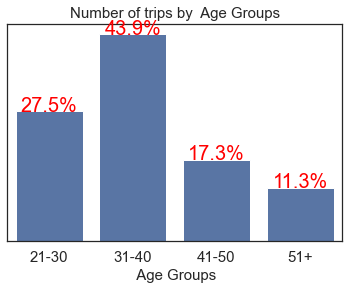

In [18]:

barplotter('age_groups',0,size,sum_freq,x_label,order = False)

# Variation in Gender across the age groups.

### The Majority of the trips are made by male users (75%) while less than a quarter are made by  female users (23%).Males dominated  trips made in all age groups.

In [20]:
## set figure size 
plt.figure(figsize = (6,6));

<Figure size 432x432 with 0 Axes>

In [21]:
## Define a helper function to plot a pie chart
def pieplot( col):
    types = bike[col].value_counts()
    size = [6,6]
    plt.pie(types,labels = None,autopct = '%1.1f%%',startangle = 90,
            counterclock = False,textprops = {'fontsize' :15})
    plt.title(f'Proportion of {col} categories',fontsize = 15)
    plt.axis('square')
    plt.legend( labels = types.index, title = col,fontsize = 15, bbox_to_anchor = [1,1])
  

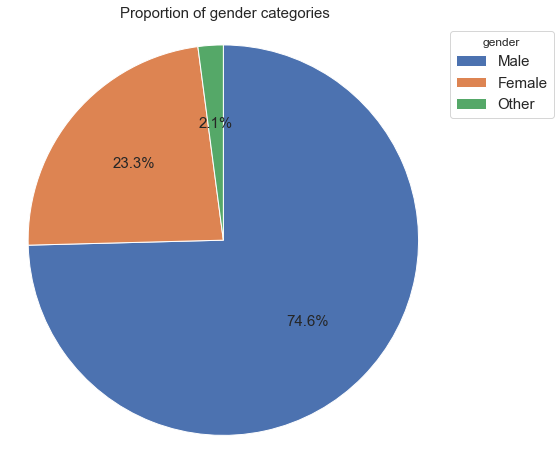

In [22]:

## plot for gender
pieplot('gender')

In [23]:
### define a function to make a clustered bar chart
def catplot(var_a,var_b,x_label):
    """A function to create a  clustered bar chart of two categorical variables"""
    sb.countplot(data = bike, x = var_a,hue = var_b)
    plt.title(f' Relationshp between {x_label} and {var_b}',fontsize = 15)
    plt.xlabel(f'{x_label}',fontsize = 15)
    plt.ylabel('Count',fontsize = 15)
    plt.legend(title = f'{var_b}',bbox_to_anchor =[1.3,1.0],fontsize = 15);
## plot for gender and age groups
x_label = "Age Groups"


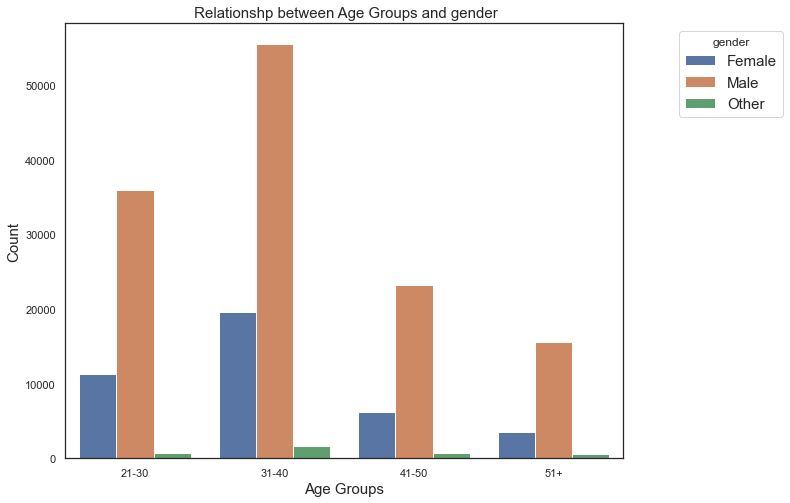

In [24]:
## plot bar graph
catplot('age_groups','gender',x_label)

# Trips made by User type

### The majority of the trips are  made by subscribers(90%) while less than 10% of them are  made by Customers. Most of the trips made by customers are made by male customers,whereas aproximately a third are  made by female customers.The trips made by the other gender type were all made by subscribers.

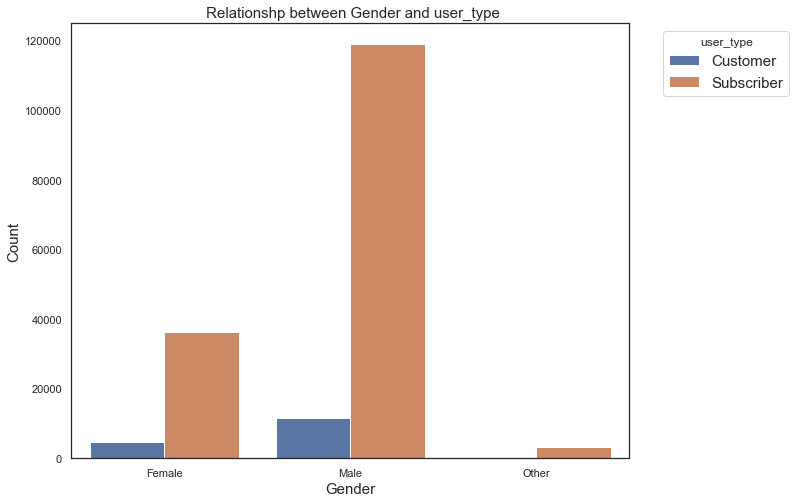

In [25]:
x_label = "Gender"
catplot('gender','user_type',x_label)

# Relationship between age groups and Bike share   

### The majority of the trips dont involve bike sharing.Bike share trips  are mostly made by users aged between 21-30.

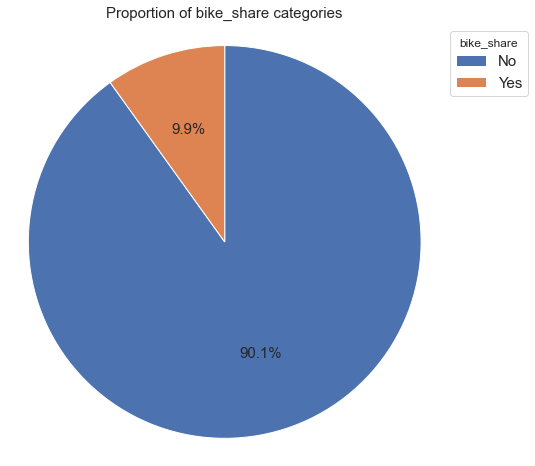

In [26]:

pieplot('bike_share')

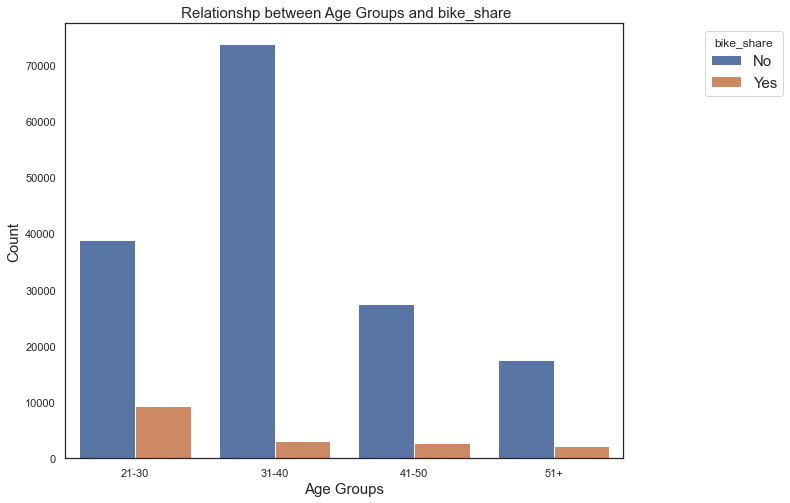

In [27]:
x_label = "Age Groups"
catplot('age_groups','bike_share',x_label)

# Number of trips per  time of day

### Most trips are made between 12am to 5 am amd between 8 am to 11 am.The third most frequent cycling time was between 5 am to 8 a.m.Summing up these three most frequnt cycling times, I can conclude that the majority of the user prefer riding their bikes between 12am to 11am.Riding form 5pm to 8pm was prefered by the least number of the users.No woman rode their bike as from 5pm to 8pm.The 'Other' gender did not undertake any rides past 2pm.This points to presence of insecurity in the area.

In [28]:
## creating bins for  time
bike['time_day'] = pd.cut((bike['start_time'] - pd.Timedelta(hours = 8)).dt.hour,
                         bins = [0,5,8,11,14,17,20,24],
                         labels = ['0 - 5','5 - 8','8 - 11','11 - 14','14 - 17','17 - 20','20 - 24'],right = False)
ordered_time = pd.api.types.CategoricalDtype(ordered = True,
                        categories = ['0 - 5','5 - 8','8 - 11','11 - 14','14 - 17','17 - 20','20 - 24'])
bike['time_day'] = bike['time_day'].astype(ordered_time)
##calculate frequencies and plot
sum_freq = bike.time_day.value_counts().sum()
size = [10,8]
x_label = "Time of the day"


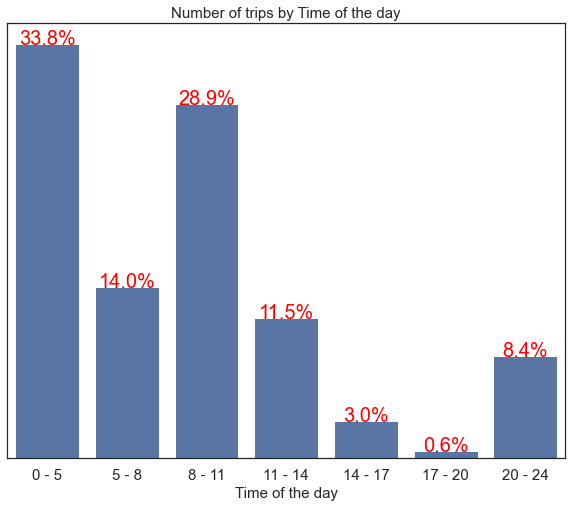

In [29]:
barplotter('time_day',0,size,sum_freq,x_label,order = False)

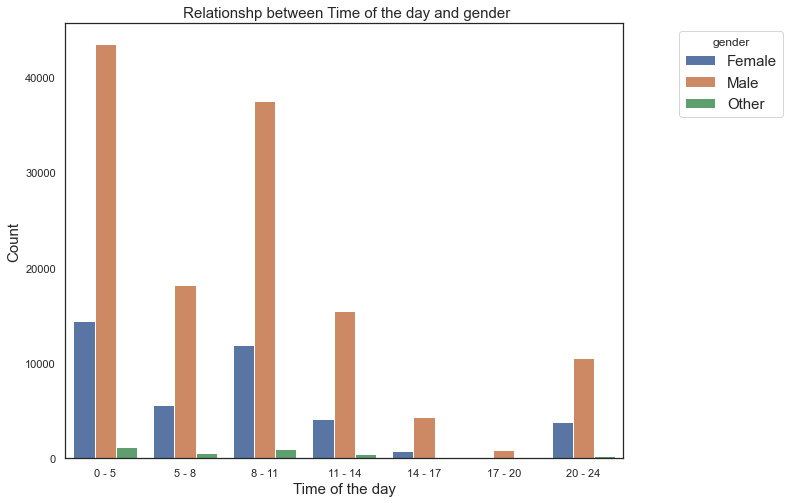

In [30]:
catplot('time_day','gender',x_label)


# Number of trips  by day

### Thursday had the highest number of trips followed by  Tuesday.The number of trips was lowest on Sunday and Saturday.This decrease can be attributed to the fact that it is the weekend and a majority of the people are usually not working.

In [31]:
import calendar
## extract the day
bike['day'] = bike.start_time.dt.day_name()
## save as categorical
ordered_d = pd.api.types.CategoricalDtype(ordered = True,categories =['Monday','Tuesday','Wednesday',
                                                                 'Thursday','Friday','Saturday','Sunday'])
bike['day'] = bike['day'].astype(ordered_d)
bike['time'] = bike['start_time'].dt.strftime('%H:%M')
## convert time back to datetime
bike['time'] = pd.to_datetime(bike['time'],format = '%H:%M').dt.time


In [32]:

size = [10,8]
sum_freq = bike.day.value_counts().sum()
x_label = "Day of the week"

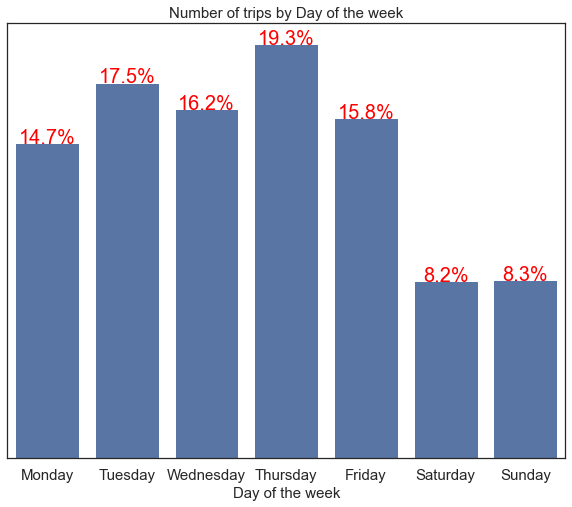

In [33]:
barplotter('day',0, size,sum_freq,x_label,order =False)

In [ ]:
!jupyter nbconvert Part_II_slide_deck_fordbike_presentation.ipynb --to slides --post serve --no-input --no-prompt